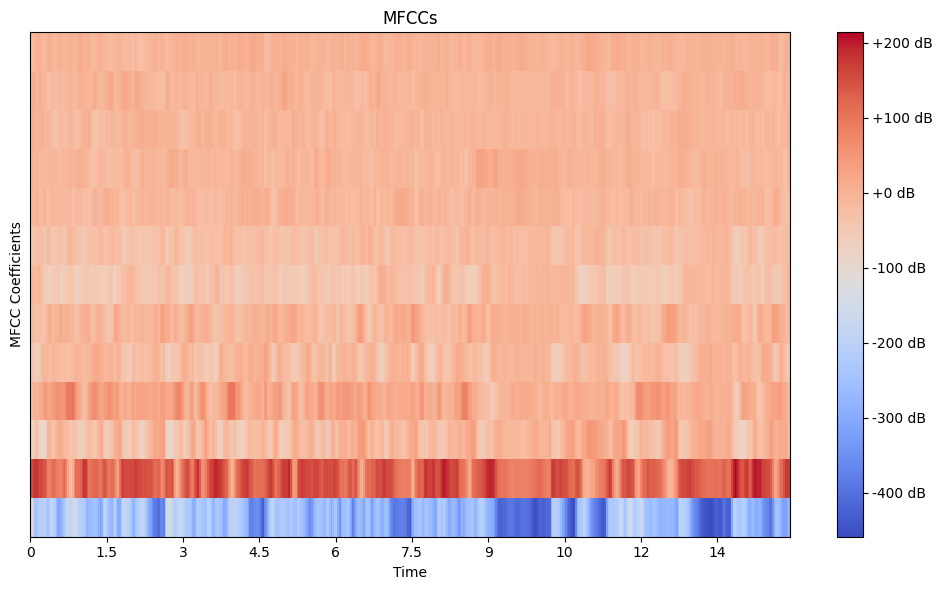

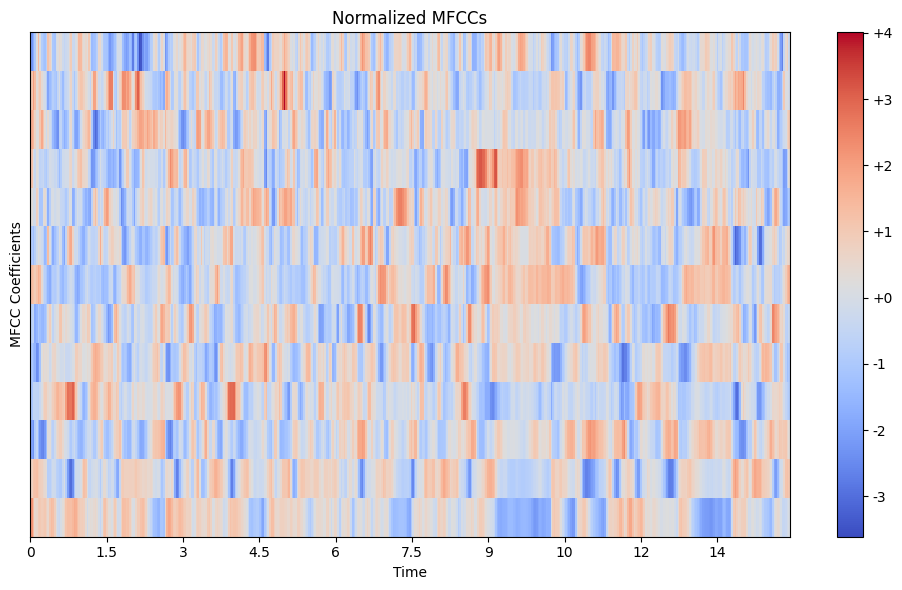

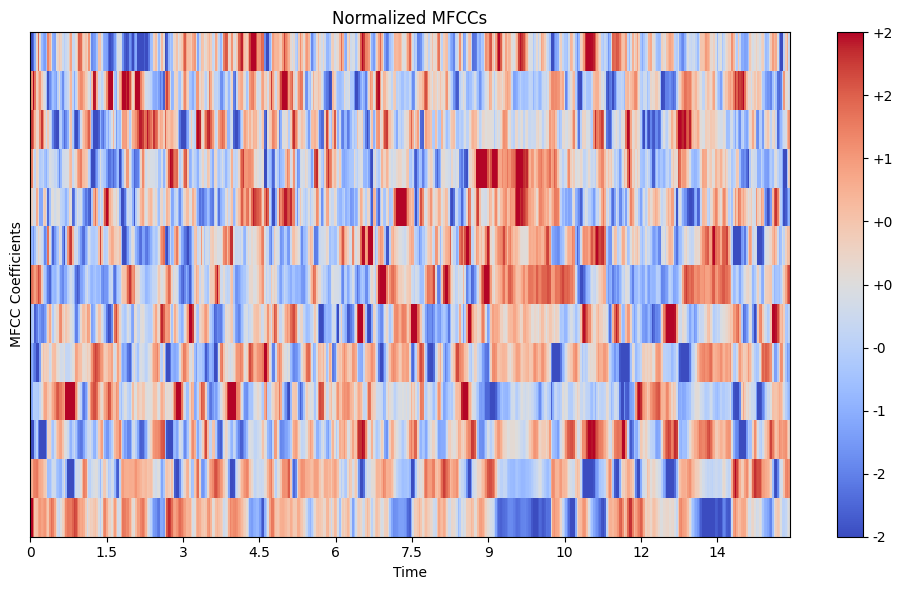

In [5]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the speech audio file
file_path = './Data/speech_4.wav'  
y, sr = librosa.load(file_path, sr=None)

# Compute MFCCs
# MFCC (Mel-Frequency Cepstral Coefficients) are features that represent the short-term power 
# spectrum of an audio signal, modeled on human auditory perception.
n_mfcc = 13  
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Plot the MFCCs
# The MFCC computation maps frequencies to the Mel scale, which is a perceptual scale based on
# how humans hear sound. Lower frequencies are given more importance, as they are more relevant 
# to speech and vocal characteristics.
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Normalize MFCCs to have zero mean and unit variance
mfccs_normalized = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / np.std(mfccs, axis=1, keepdims=True)

# Plot the normalized MFCCs
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs_normalized, x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f')
plt.title('Normalized MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

# Normalize MFCCs with safeguards
std_dev = np.std(mfccs, axis=1, keepdims=True)
std_dev[std_dev == 0] = 1  # Avoid division by zero
mfccs_normalized = (mfccs - np.mean(mfccs, axis=1, keepdims=True)) / std_dev

# Plot the normalized MFCCs with adjusted color scale
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs_normalized, x_axis='time', sr=sr, vmin=-2, vmax=2)
plt.colorbar(format='%+2.0f')
plt.title('Normalized MFCCs')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [7]:
file_path_2 = './Data/speech_5.wav'  
y_2, sr_2 = librosa.load(file_path_2, sr=None)

n_mfcc_2 = 13  
mfccs_2 = librosa.feature.mfcc(y=y_2, sr=sr_2, n_mfcc=n_mfcc_2)

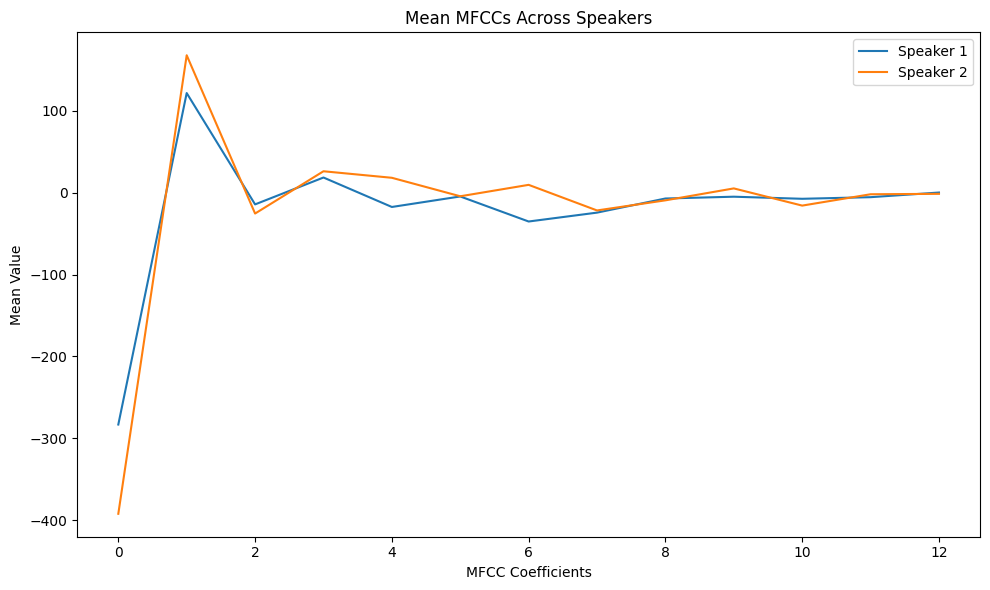

In [ ]:
# Plot the mean values of MFCC coefficients for each speaker, summarizing 
# the spectral envelope characteristics captured by the MFCCs

plt.figure(figsize=(10, 6))
for idx, speaker_mfcc in enumerate([mfccs, mfccs_2]):
    plt.plot(np.mean(speaker_mfcc, axis=1), label=f'Speaker {idx + 1}')
plt.legend()
plt.title('Mean MFCCs Across Speakers')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.tight_layout()
plt.show()

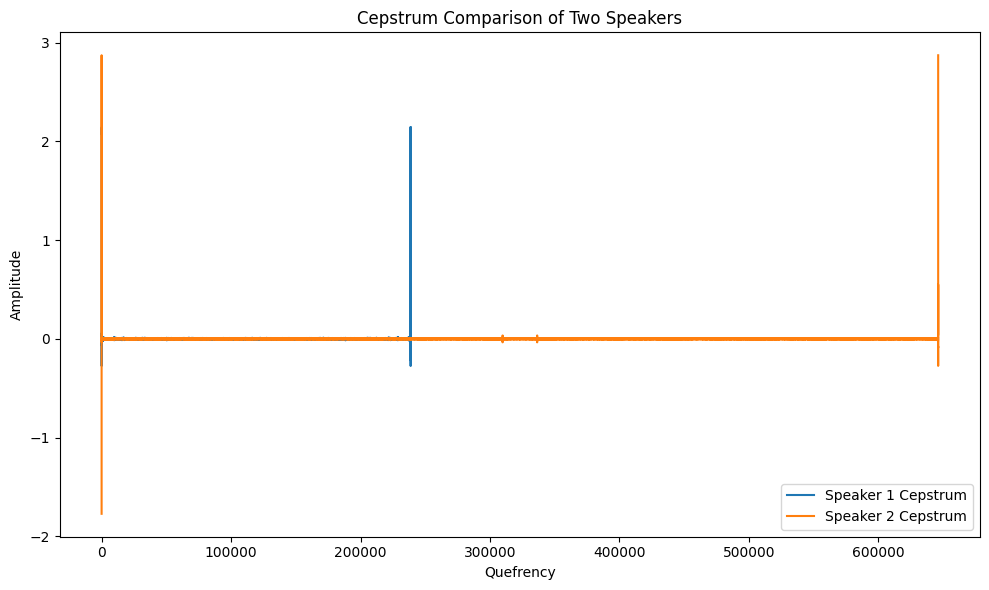

In [11]:
# Compute the cepstrum for both audio signals
power_spectrum_1 = np.abs(np.fft.fft(y))**2
log_power_spectrum_1 = np.log(power_spectrum_1)
cepstrum_1 = np.fft.ifft(log_power_spectrum_1).real

power_spectrum_2 = np.abs(np.fft.fft(y_2))**2
log_power_spectrum_2 = np.log(power_spectrum_2)
cepstrum_2 = np.fft.ifft(log_power_spectrum_2).real

# Plot the cepstrum of both signals
plt.figure(figsize=(10, 6))
plt.plot(cepstrum_1, label='Speaker 1 Cepstrum')
plt.plot(cepstrum_2, label='Speaker 2 Cepstrum')
plt.legend()
plt.title('Cepstrum Comparison of Two Speakers')
plt.xlabel('Quefrency')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

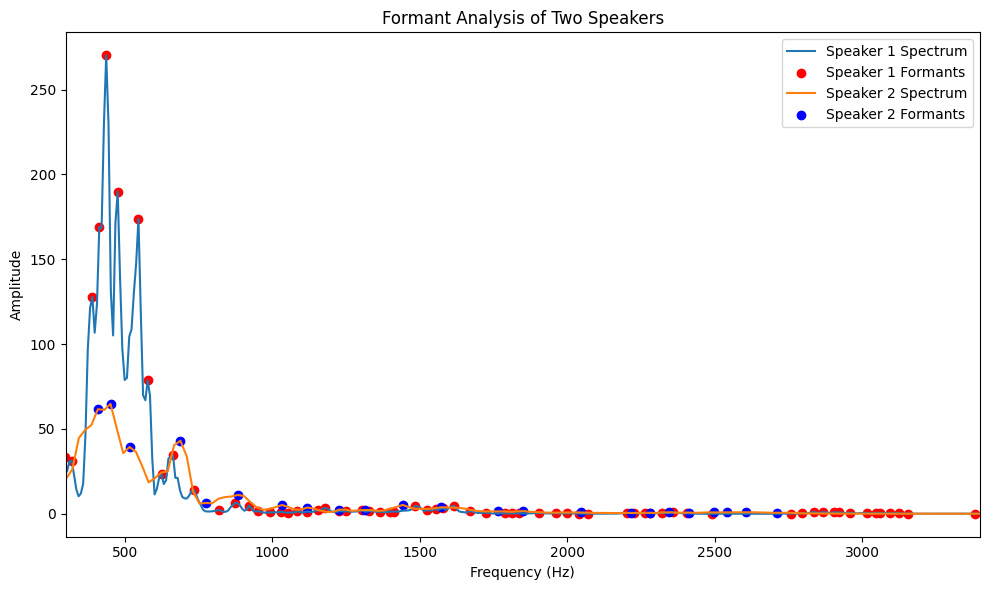

In [13]:
from scipy.signal import find_peaks

# Compute the spectrogram for Speaker 1
D_1 = librosa.stft(y)
spectrogram_1 = np.abs(D_1)**2
mean_spectrum_1 = np.mean(spectrogram_1, axis=1)

D_2 = librosa.stft(y_2)
spectrogram_2 = np.abs(D_2)**2
mean_spectrum_2 = np.mean(spectrogram_2, axis=1)

# Find peaks (formants) in the spectrum for Speaker 1
peaks_1, _ = find_peaks(mean_spectrum_1, height=0.1)  
formant_frequencies_1 = librosa.fft_frequencies(sr=sr)[peaks_1]

peaks_2, _ = find_peaks(mean_spectrum_2, height=0.1)  
formant_frequencies_2 = librosa.fft_frequencies(sr=sr_2)[peaks_2]

# Plot the formant analysis for both speakers
plt.figure(figsize=(10, 6))
plt.plot(librosa.fft_frequencies(sr=sr), mean_spectrum_1, label='Speaker 1 Spectrum')
plt.scatter(formant_frequencies_1, mean_spectrum_1[peaks_1], color='red', label='Speaker 1 Formants')
plt.plot(librosa.fft_frequencies(sr=sr_2), mean_spectrum_2, label='Speaker 2 Spectrum')
plt.scatter(formant_frequencies_2, mean_spectrum_2[peaks_2], color='blue', label='Speaker 2 Formants')
plt.title('Formant Analysis of Two Speakers')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(300, 3400)  # Zoom in on the speech frequency range
plt.tight_layout()
plt.show()

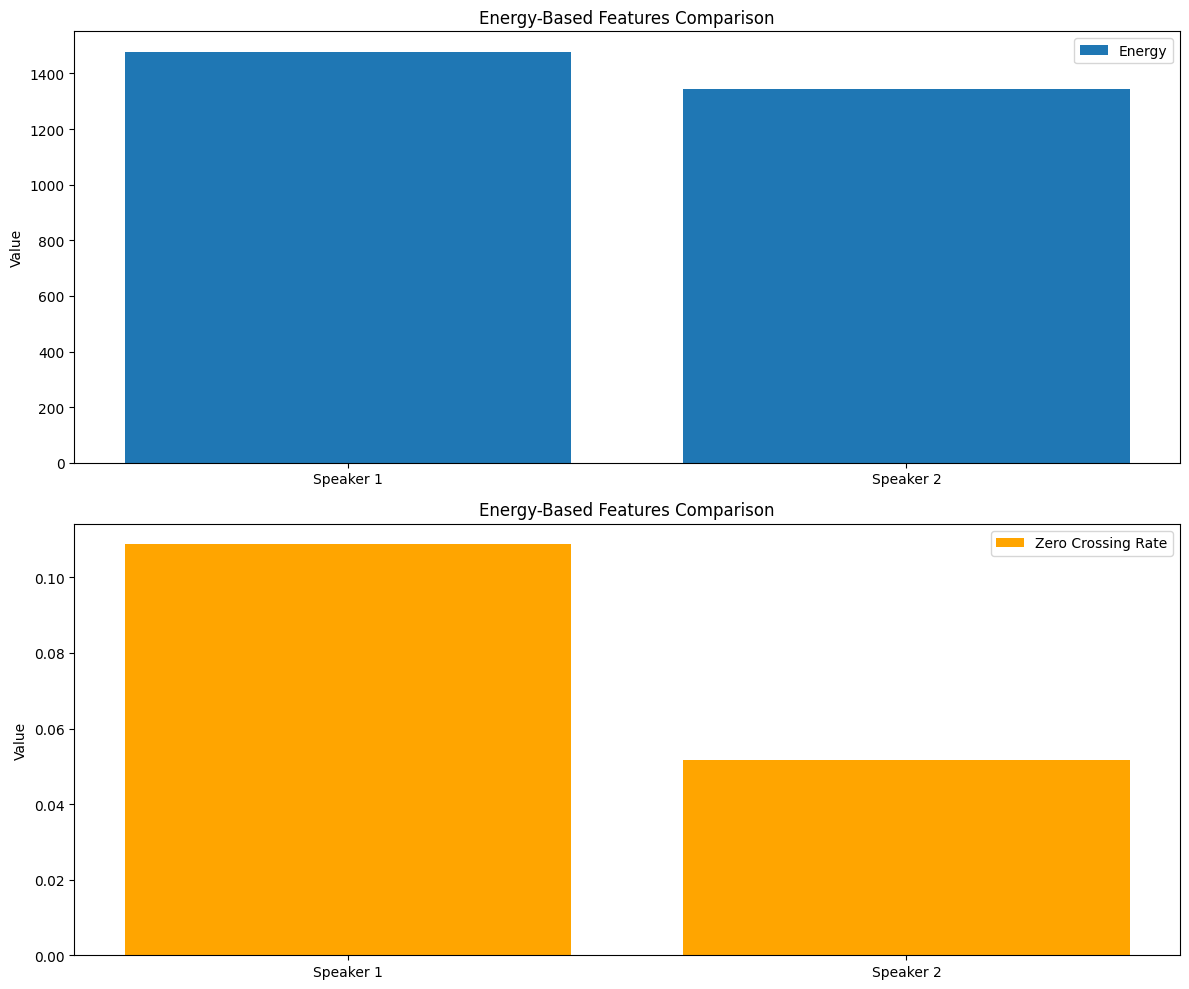

In [20]:
# Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Compute Energy-Based Features for Speaker 1
energy_1 = np.sum(np.abs(y)**2)
zero_crossing_rate_1 = librosa.feature.zero_crossing_rate(y)[0]

# Compute Energy-Based Features for Speaker 2
energy_2 = np.sum(np.abs(y_2)**2)
zero_crossing_rate_2 = librosa.feature.zero_crossing_rate(y_2)[0]

# Combine Features into a Hybrid Plot
plt.figure(figsize=(12, 10))

# Energy-Based Features Comparison
plt.subplot(2, 1, 1)
plt.bar(['Speaker 1', 'Speaker 2'], [energy_1, energy_2], label='Energy')
plt.title('Energy-Based Features Comparison')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.bar(['Speaker 1', 'Speaker 2'], [np.mean(zero_crossing_rate_1), np.mean(zero_crossing_rate_2)], label='Zero Crossing Rate', color='orange')
plt.title('Energy-Based Features Comparison')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()